**Student:** Michele Cristina Otta

# Linear Regression
Toy Problem: predict student's scores based on their studying hours

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [ ]:
# load dataset
df = pd.read_csv("student_scores.csv")

hours = df[['Hours']]
scores = df[['Scores']]

# 80% data for training 20% data for validation
hours_training, hours_test, scores_training, scores_test = train_test_split(hours, scores, test_size=0.2, random_state=42)

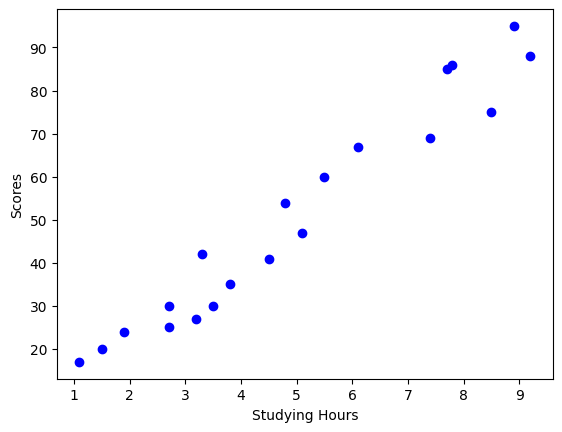

In [ ]:
# show features' correlation
plt.scatter(hours_training, scores_training, color='blue')
plt.xlabel("Studying Hours")
plt.ylabel("Scores")
plt.show()

In [ ]:
# create Linear Regression model
modelo =  linear_model.LinearRegression()

# training the model
modelo.fit(hours_training, scores_training)

LinearRegression()

In [ ]:
# show coefficients (A and B)
print('(A) Intercept: ', modelo.intercept_)
print('(B) Slope: ', modelo.coef_)

(A) Intercept:  [2.82689235]
(B) Slope:  [[9.68207815]]


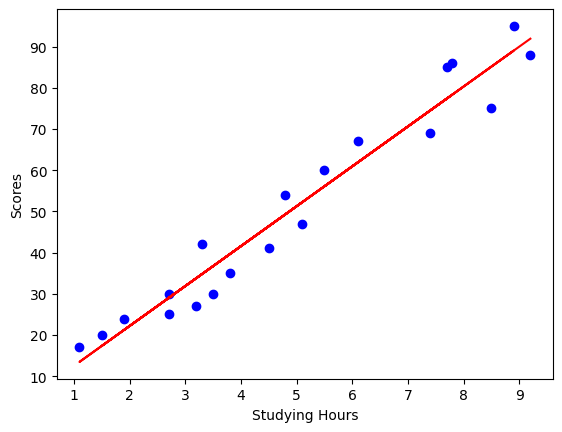

In [ ]:
# show regression line
plt.scatter(hours_training, scores_training, color='blue')
plt.plot(hours_training, modelo.coef_[0][0]*hours_training + modelo.intercept_[0], '-r')
plt.ylabel("Scores")
plt.xlabel("Studying Hours")
plt.show()

In [ ]:
# model -> validation data
predictScores = modelo.predict(hours_test)

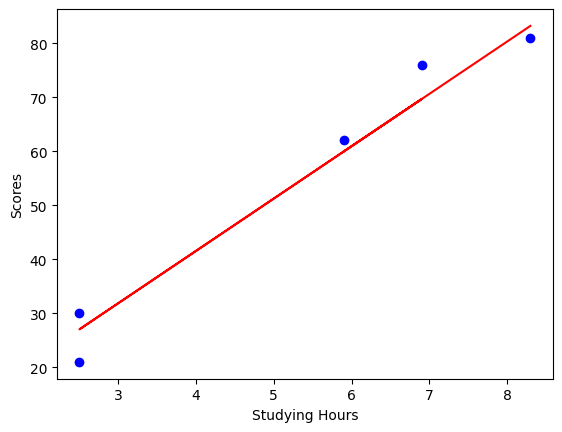

In [ ]:
# show regression line -> validation data
plt.scatter(hours_test, scores_test, color='blue')
plt.plot(hours_test, modelo.coef_[0][0]*hours_test + modelo.intercept_[0], '-r')
plt.ylabel("Scores")
plt.xlabel("Studying Hours")
plt.show()

In [ ]:
# results
print("Sum of Squared Errors (SSE): %2.f " % np.sum((predictScores - scores_test)**2))
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(scores_test, predictScores))
print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(scores_test, predictScores))
print("Root Mean Squared Error (RMSE): %.2f " % sqrt(mean_squared_error(scores_test, predictScores)))
print("R2-score: %.2f" % r2_score(predictScores , scores_test) )

Sum of Squared Errors (SSE): 95 
Mean Squared Error (MSE): 18.94
Mean Absolute Error (MAE): 3.92
Root Mean Squared Error (RMSE): 4.35 
R2-score: 0.96


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
<ipython-input-11-12d77f0e6cb3>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("Sum of Squared Errors (SSE): %2.f " % np.sum((predictScores - scores_test)**2))


# Logistic Regression
Toy Problem: target Promotional Offers Used (Yes/No) based on the features: Daily Watch Time (Hours), Engagement Rate (1-10) and Monthly Income ($).

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             recall_score,
                             precision_score)

In [3]:
# load dataset
df = pd.read_csv("Netflix Engagement Dataset.csv")

X = df[['Daily Watch Time (Hours)', 'Engagement Rate (1-10)', 'Monthly Income ($)']]
y = df['Promotional Offers Used']

# convert Yes/No -> 0 or 1
y = y.apply(lambda x: 1 if x == 'Yes' else 0)

# 75% data for training 25% data for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [4]:
# create a Logistic Regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# model -> validation data
y_pred = logistic_regression.predict(X_test)

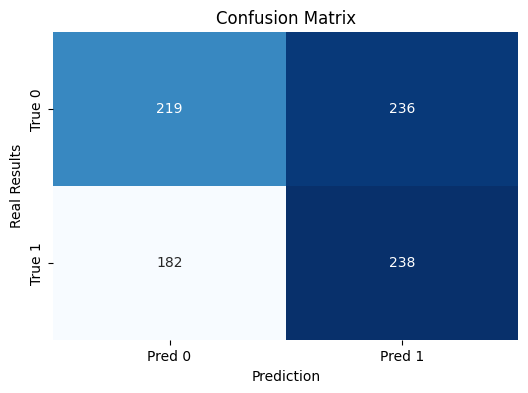

In [13]:
# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

confusion_matrix_df = pd.DataFrame(cm, index=['True 0', 'True 1'], columns=['Pred 0', 'Pred 1'])

plt.figure(figsize=(6, 4))
sn.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Real Results')
plt.show()

In [ ]:
# results
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.5222857142857142


# References
https://github.com/diogocortiz/Curso-IA-para-todos/blob/master/RegressaoLinear/CrashCourse_Regress%C3%A3o_Linear.ipynb
https://www.computersciencemaster.com.br/o-que-e-regressao-logistica-e-como-aplica-la-usando-python/